<a href="https://colab.research.google.com/github/habonimana/PyTorch-for-Deep-Learning/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps

* get data ready (turn into tensors)
* Build or pick a pretrained model (to suit your problem)
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Dave and reload your trained model



## What we're going to cover

In this module we're going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # these are the basic building blocks for graphs:
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.0+cpu'

1. Data (preparing and loading)
* turn data into numbers
* build model to learn patterns in numbers

 Data can be almost anything ... in machine learning
 * Excel spreadsheed
 * image of any kind
 * Videos (youtube..)
 * Text
 * DNA
 Machine learning is a game of two things:
 * get data into a numerical representation
 * Build a model to learn numerical patterns (Learns representation (patterns/features/weights) and Representation outputs)

 To showcase thism let's create a known data using the linear regression formular.
 We'll yse a linear regression formula to make a straight line with know parameters 

 https://www.geeksforgeeks.org/linear-regression-formula/
 Y = a + b*x
 

In [3]:
# Create *known* parameters using lineal regression
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## 1. Split Data: The most important concept in machine learning 
* training set
* validation set (tune model patterns)
* test set (see if the model is ready for the world)
*
- the whole purpose is generalization: Generalization is the ability of the model to perform well on data it hasn't seen before
- You do not always need validation set
- 80 and 20% is the most populat split


In [5]:

# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

visualize, visualize, visualize

In [7]:
def plot_predictions(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
    """ 
    Plots training data, test data and compare predictions
    """

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label= "Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exist 
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    # show the legend
    plt.legend(prop = {"size":14})

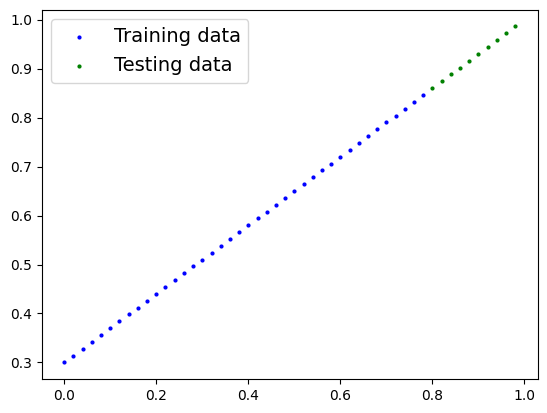

In [8]:
plot_predictions()

## 2. Build model
- our first PyTorch model!
- It is going to be a lineal regression model
- This is to be done through a forward computation model

what our model does (we are trying to guess the weight and bias):
* start with random values (weight * bias )
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 

Through two main algorithms: https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown
1. Gradient descent (when we set requires_grad=True)
2. Backpropagation

<img src="https://github.com/habonimana/PyTorch-for-Deep-Learning/blob/main/images/linear_regression.png?raw=true" width=900 />


In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
    # Almost everything inherit from nn module
    # it is the base class for all neural network modules 

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # these parameters are going to be random and model is PyTorch is supposed to look at our data and update them to best represent our know parameters
                                                requires_grad=True,
                                                dtype = torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model

    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula
        
        


### PyTorch model building essentials 
* torch.nn contains all of the b
* torch.nn.Parameters 
* torch.nn.Module The base class foe all neural netword modules
* torch.optim - this where the optimizers in PyTorch lives
* def forward() - All nn.Module subclasses require you to override forward 

this is from https://pytorch.org/tutorials/beginner/ptcheat.html

* import torch.autograd as autograd         # computation graph
* from torch import Tensor                  # tensor node in the computation graph
* import torch.nn as nn                     # neural networks
* import torch.nn.functional as F           # layers, activations and more
* import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
* from torch.jit import script, trace       # hybrid frontend decorator and tracing jit

### Checking the contents of our Pytorch model
using .parameters()

In [10]:
# Create a random seed
torch.manual_seed(42) # this ensures that we get same values each time
# the main idea is to start our model with random values
# however, for the model to be re-usable, we need it to be reproductible

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
model_0.parameters()

<generator object Module.parameters at 0x000001B63FA8B920>

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters 
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_model()`
to check our model's predictive power, let's see how well it predits `y_test` based on `X_test`

when we pass data trough our model it's going to run it through the `forward()` method

In [13]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [14]:
y_preds = model_0(X_test) # by doing this, it means PyTorch will keep backward data and thus make predictions slow
# that's why I have to always use inference_mode()
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Want to make your inference code in PyTorch run faster? Here’s a quick thread on doing exactly that. <br><br>1. Replace <a href="https://t.co/OG6jlroK1O">https://t.co/OG6jlroK1O</a>_grad() with the ✨torch.inference_mode()✨ context manager. <a href="https://t.co/EbKarCvrGT">pic.twitter.com/EbKarCvrGT</a></p>&mdash; PyTorch (@PyTorch) <a href="https://twitter.com/PyTorch/status/1437838231505096708?ref_src=twsrc%5Etfw">September 14, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

In [15]:
# make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

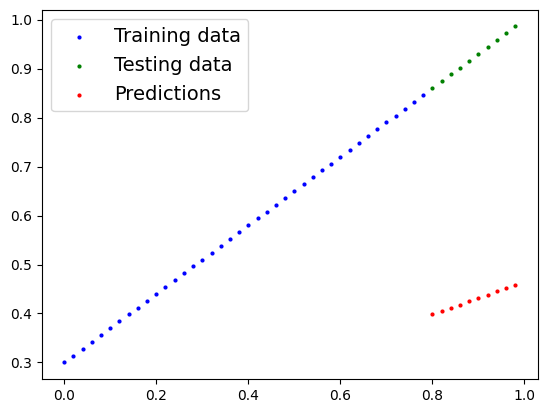

In [16]:
plot_predictions(predictions=y_preds)

### 3. Train model
the whole idea of training is for a model to move from `unknown` parameters to some `known` parameters

or in other words from a poor representation to a better representation

One way to measure how poor or how wrong your models predictions are in to use loss functions
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to use loss function.

Things we need to train:
* Loss function: the lower is better
* Optimizer : take into accoun the loss of a model and adjusts the model's parameters (eg. weight and bias) to improve the loss function

And specifically for PyTroch, we need:
* A training loop
* A testing loop

In [17]:

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

https://pytorch.org/docs/stable/optim.html

* the smaller the learning rate, the smaller the change in learning
* the higher it is, the higher the jump


In [18]:
# setup a loss function 

loss_fn = nn.L1Loss()

# setup an Optimizer (stochastic gradient descent)



Q: Which loss function and optimizer should I use?

A: This will be probless specific

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. loop through the data
1. forward pass (this involves data moving through our model's `forward()` function), also called forward propagation, to make forward pass predictions to ground truth labels 
2. Calculate the loss 
3. Optimizer zero grad 
4. Loss backward - move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimzer step -  use the optimizer to adjust our model's parameters to try and improve loss (**gradient descent**)


In [19]:
# Create a random seed
torch.manual_seed(42) # this ensures that we get same values each time
model_0 = LinearRegressionModel()

In [20]:
# Always create optimizer after the model
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameters you can set a data scientist 


In [21]:
import numpy as np

In [22]:

torch.manual_seed(42)


# An epoch is one loop through the data ...
epochs = 180 # this is a hyperparameters because we set them ourselves 

# Track values

epoch_count = []
loss_values = []
test_loss_values = []


# 0. Loop through the data 
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

    #1. forward  pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train) # output = loss(input, target)

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)

    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them in the step3 for next iteration of the loop

    # Testing 
    model_0.eval() # turn off gradient tracking/ settings not needed for evaluation/testing (dropout layers and batchNorm)
    with torch.inference_mode(): # turn off gradient tracking and a couple more things not needed 
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    if epoch % 10 == 0:
        
        print(f"Epoch: {epoch} | Loss: {loss} || Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 || Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 || Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 || Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 || Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 || Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 || Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 || Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Los

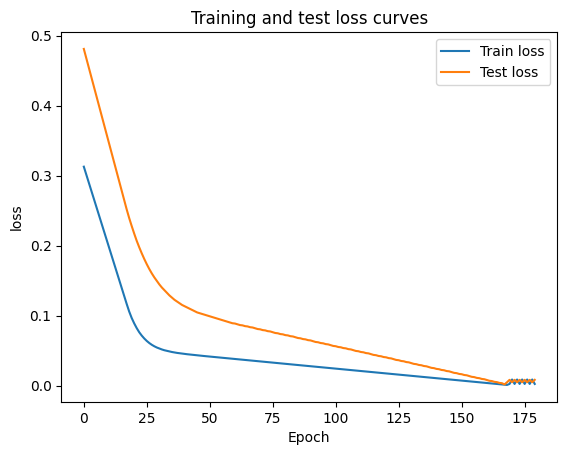

In [23]:
# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()) , label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epoch"
)
plt.legend();

In [24]:
weight, bias

(0.7, 0.3)

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

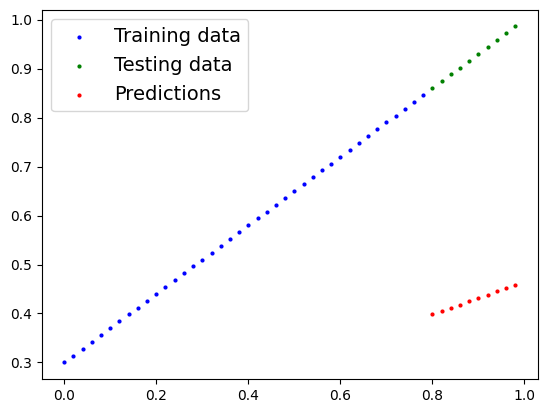

In [27]:
plot_predictions(predictions=y_preds)

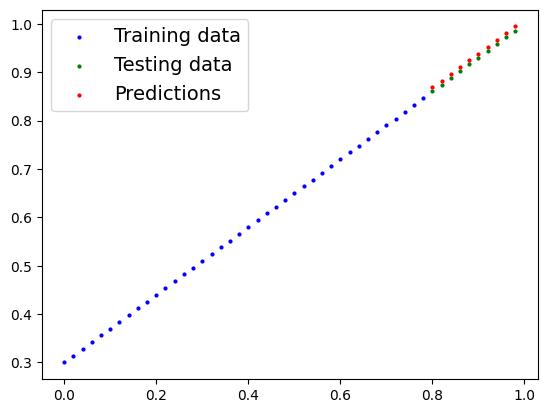

In [28]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch

https://pytorch.org/tutorials/beginner/saving_loading_models.html

There are three main methods you should know about for saving and loading in PyTorch 

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionaly 

In [29]:
# Saving our PyTorch model
from pathlib import Path

#1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pt
